# 1) Develop a simple linear regression model using Statmodels. What can you conclude regarding the features from the results?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

C:\Users\saket\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [4]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [5]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [6]:
df['wip']=df['wip'].replace(np.NaN,0)

In [18]:
df.corr()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,1.000000,-0.285803,-0.217110,0.039676,0.000077,-0.025333,0.003603,0.011125,-0.231191,0.122042,0.053770,0.081677,0.218551,-0.005800,-0.061954
quarter,-0.285803,1.000000,0.018347,-0.024301,0.021038,-0.112319,-0.000105,-0.064439,0.026654,-0.028237,-0.060779,-0.023884,0.189905,-0.005594,-0.051970
department,-0.217110,0.018347,1.000000,-0.018350,0.026150,-0.045865,0.797716,0.355417,0.629531,-0.007455,0.045000,0.088480,0.275308,0.857813,-0.035647
day,0.039676,-0.024301,-0.018350,1.000000,-0.011434,-0.017908,0.007971,-0.110402,-0.018269,-0.114016,-0.008913,0.029340,0.025941,0.008078,-0.015690
team,0.000077,0.021038,0.026150,-0.011434,1.000000,0.030274,-0.110011,-0.011057,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,-0.025333,-0.112319,-0.045865,-0.017908,0.030274,1.000000,-0.069489,0.019035,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,0.003603,-0.000105,0.797716,0.007971,-0.110011,-0.069489,1.000000,0.322704,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,0.011125,-0.064439,0.355417,-0.110402,-0.011057,0.019035,0.322704,1.000000,0.276529,0.037946,-0.005101,-0.007119,0.053293,0.373908,0.047389
over_time,-0.231191,0.026654,0.629531,-0.018269,-0.096737,-0.088557,0.674887,0.276529,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,0.122042,-0.028237,-0.007455,-0.114016,-0.007674,0.032768,0.032629,0.037946,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538


In [7]:
df['date']=df['date'].astype('category')
df['date']=df['date'].cat.codes

In [8]:
df['quarter']=df['quarter'].astype('category')
df['quarter']=df['quarter'].cat.codes

In [9]:
df['department']=df['department'].astype('category')
df['department']=df['department'].cat.codes

In [10]:
df['day']=df['day'].astype('category')
df['day']=df['day'].cat.codes

In [11]:
y=df['actual_productivity']
X=df.drop('actual_productivity',axis=1)

X

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0,0,2,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,0,0,1,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0
2,0,0,2,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,0,0,2,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,0,0,2,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,51,1,0,5,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0
1193,51,1,0,5,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0
1194,51,1,0,5,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0
1195,51,1,0,5,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0


In [12]:
model=sm.OLS(endog=y,exog=X)
results=model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     actual_productivity   R-squared (uncentered):                   0.960
Model:                             OLS   Adj. R-squared (uncentered):              0.960
Method:                  Least Squares   F-statistic:                              2038.
Date:                 Sun, 11 Sep 2022   Prob (F-statistic):                        0.00
Time:                         13:06:18   Log-Likelihood:                          566.37
No. Observations:                 1197   AIC:                                     -1105.
Df Residuals:                     1183   BIC:                                     -1034.
Df Model:                           14                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

##### From the OLS Regression model results, we can interpretate the R-Squared is 0.960 and Adjusted R-Squared are 0.960 ratio.The p-values of day,wip,over_time,idle_time are not significant and can be removed as the values of "P" are greater than 0.05. 

# 2. Select the best features using forward selection.

In [13]:
X=X.drop(['day','wip','over_time','idle_time'],axis=1)
X

,date,quarter,department,team,targeted_productivity,smv,incentive,idle_men,no_of_style_change,no_of_workers
0,0,0,2,8,0.80,26.16,98,0,0,59.0
1,0,0,1,1,0.75,3.94,0,0,0,8.0
2,0,0,2,11,0.80,11.41,50,0,0,30.5
3,0,0,2,12,0.80,11.41,50,0,0,30.5
4,0,0,2,6,0.80,25.90,50,0,0,56.0
...,...,...,...,...,...,...,...,...,...,...
1192,51,1,0,10,0.75,2.90,0,0,0,8.0
1193,51,1,0,8,0.70,3.90,0,0,0,8.0
1194,51,1,0,7,0.65,3.90,0,0,0,8.0
1195,51,1,0,9,0.75,2.90,0,0,0,15.0


# 3. Compare the performance of OLS and SGD implementation of linear model.

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=143)

In [15]:
reg=make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000,tol=1e-3))
reg.fit(X_train,y_train)
yhat=reg.predict(X_test)

In [16]:
val_error=mean_squared_error(y_test,yhat)

y_train_pred=reg.predict(X_train)
train_error=mean_squared_error(y_train,y_train_pred)

scores=cross_validate(reg,X_train,y_train,cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = reg.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.02294158061126841
Validation MSE:  0.21888754610904052
R-squared: 0.3489636746757615


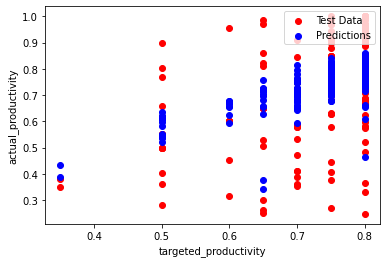

In [17]:
plt.scatter(X_test['targeted_productivity'],y_test,color='red',label='Test Data')
plt.scatter(X_test['targeted_productivity'],yhat,color='blue',label='Predictions')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.legend(loc='upper right')
plt.show()

##### The R-squared value is more for OLS model that is 0.974 as compared to R-squared value for SGD. We would like to go ahead with OLS model for linear regression calculation.

# 4. Develop a polynomial regression model with stochastic gradient descent. Identify the best learning rate (0.0001, 0.001, 0.01, 0.01 and 1) for both the above models.

In [19]:
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,train_size=0.8,test_size=0.2,random_state=143)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [21]:
poly_fea= PolynomialFeatures(degree=2,include_bias=False)
X_train_poly= poly_fea.fit_transform(X_train)
X_test_poly= poly_fea.fit_transform(X_test)
X_val_poly= poly_fea.fit_transform(X_val)

sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,random_state=143,learning_rate='invscaling',eta0=0.0001)
sgd_reg.fit(X_train_poly,y_train.ravel())
poly_train_pred=sgd_reg.predict(X_train_poly)
poly_test_pred=sgd_reg.predict(X_test_poly)
poly_val_pred=sgd_reg.predict(X_val_poly)


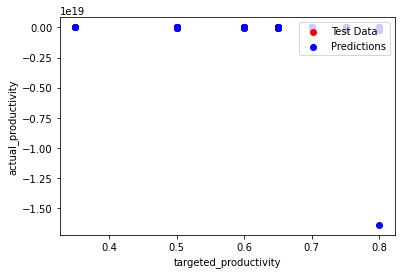

In [22]:
plt.scatter(X_test['targeted_productivity'],y_test,color='red',label='Test Data')
plt.scatter(X_test['targeted_productivity'],poly_test_pred,color='blue',label='Predictions')
plt.xlabel('targeted_productivity')
plt.ylabel('actual_productivity')
plt.legend(loc='upper right')
plt.show()

In [23]:
val_error = mean_squared_error(y_val, poly_val_pred)
train_error = mean_squared_error(y_train, poly_train_pred)

print("Training MSE: ", train_error)
print("Validation MSE: ", val_error)

score = sgd_reg.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  5.10886278530699e+37
Validation MSE:  2.1903353041435722e+33
R-squared: -1.66431147843576e+39


In [24]:
sgd_reg1=SGDRegressor(max_iter=1000,tol=1e-3,random_state=143,learning_rate='invscaling',eta0=0.001)
sgd_reg1.fit(X_train_poly,y_train.ravel())
poly_train_pred1=sgd_reg1.predict(X_train_poly)
poly_test_pred1=sgd_reg1.predict(X_test_poly)
poly_val_pred1=sgd_reg1.predict(X_val_poly)
val_error1 = mean_squared_error(y_val, poly_val_pred1)
train_error1 = mean_squared_error(y_train, poly_train_pred1)

print("Training MSE: ", train_error1)
print("Validation MSE: ", val_error1)

score = sgd_reg1.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  5.1105232112422604e+39
Validation MSE:  2.169695864346073e+35
R-squared: -1.66485239449855e+41


In [25]:
sgd_reg2=SGDRegressor(max_iter=1000,tol=1e-3,random_state=143,learning_rate='invscaling',eta0=0.01)
sgd_reg2.fit(X_train_poly,y_train.ravel())
poly_train_pred2=sgd_reg2.predict(X_train_poly)
poly_test_pred2=sgd_reg2.predict(X_test_poly)
poly_val_pred2=sgd_reg2.predict(X_val_poly)


val_error2 = mean_squared_error(y_val, poly_val_pred2)
train_error2 = mean_squared_error(y_train, poly_train_pred2)

print("Training MSE: ", train_error2)
print("Validation MSE: ", val_error2)

score = sgd_reg2.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  5.108547222709123e+41
Validation MSE:  2.188810010676067e+37
R-squared: -1.664208677778184e+43


In [26]:
sgd_reg4=SGDRegressor(max_iter=1000,tol=1e-3,random_state=143,learning_rate='invscaling',eta0=0.1)
sgd_reg4.fit(X_train_poly,y_train.ravel())
poly_train_pred4=sgd_reg4.predict(X_train_poly)
poly_test_pred4=sgd_reg4.predict(X_test_poly)
poly_val_pred4=sgd_reg4.predict(X_val_poly)


val_error4 = mean_squared_error(y_val, poly_val_pred4)
train_error4 = mean_squared_error(y_train, poly_train_pred4)

print("Training MSE: ", train_error4)
print("Validation MSE: ", val_error4)

score = sgd_reg4.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  4.893591729604768e+43
Validation MSE:  2.1419349549913175e+39
R-squared: -1.5941827425435778e+45


In [27]:
sgd_reg3=SGDRegressor(max_iter=1000,tol=1e-3,random_state=143,learning_rate='invscaling',eta0=1.0)
sgd_reg3.fit(X_train_poly,y_train.ravel())
poly_train_pred3=sgd_reg3.predict(X_train_poly)
poly_test_pred3=sgd_reg3.predict(X_test_poly)
poly_val_pred3=sgd_reg3.predict(X_val_poly)
val_error3 = mean_squared_error(y_val, poly_val_pred3)
train_error3 = mean_squared_error(y_train, poly_train_pred3)

print("Training MSE: ", train_error3)
print("Validation MSE: ", val_error3)

score = sgd_reg3.score(X_train_poly, y_train)
print("R-squared:", score)

Training MSE:  3.4118980499983026e+45
Validation MSE:  3.439594465206179e+41
R-squared: -1.111492190433442e+47


# 5. Implement Lasso regression model. Does early stopping affect the any of the model’s performance?


In [28]:
#lasso regression model
lasso=make_pipeline(StandardScaler(),SGDRegressor(alpha=0.0001,epsilon=0.01,eta0=0.1,penalty="l1",max_iter=1000, tol=1e-3, random_state=143))
lasso.fit(X_train,y_train)
lasso_train_pred=lasso.predict(X_train)
lasso_test_pred=lasso.predict(X_test)
lasso_val_pred=lasso.predict(X_val)

val_error=mean_squared_error(y_val,lasso_val_pred)
train_error=mean_squared_error(y_train,lasso_train_pred)
scores=cross_validate(lasso,X_train,y_train,cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = lasso.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.02404696737548657
Validation MSE:  0.04878837463754652
R-squared: 0.3092852732948961


In [29]:
#Early stopping checking
lasso=make_pipeline(StandardScaler(),SGDRegressor(early_stopping=True,penalty="l1",max_iter=1000, tol=1e-3, random_state=143))
lasso.fit(X_train,y_train)
lasso_train_pred=lasso.predict(X_train)
lasso_test_pred=lasso.predict(X_test)
lasso_val_pred=lasso.predict(X_val)

val_error=mean_squared_error(y_val,lasso_val_pred)
train_error=mean_squared_error(y_train,lasso_train_pred)
scores=cross_validate(lasso,X_train,y_train,cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = lasso.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.02273665283599674
Validation MSE:  0.22559589053005233
R-squared: 0.3567875989312209


In [30]:
#Hyper-parameters to find out best alpha, learning_rate and loss
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
SGD = SGDRegressor(penalty="l1")

parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(estimator = SGD, param_grid = parameters, cv = 2, n_jobs=-1)

clf.fit(X_train, y_train)
clf.best_params_

{'alpha': 0.1, 'learning_rate': 'optimal', 'loss': 'huber'}

# 6. Implement Ridge regression model. Identify the best learning rate, type of learning rate and loss function for this model.

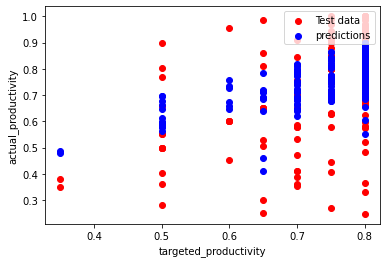

In [31]:
ridge=make_pipeline(StandardScaler(),SGDRegressor(alpha=0.0001,epsilon=0.01,eta0=0.1,penalty="l2",max_iter=1000,tol=1e-3,random_state=143))
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)

plt.scatter(X_test['targeted_productivity'], y_test, color = "red", label = "Test data")
plt.scatter(X_test['targeted_productivity'], y_pred, color = "blue", label = "predictions")
plt.xlabel("targeted_productivity")
plt.ylabel("actual_productivity")
plt.legend(loc="upper right")
plt.show()

In [32]:
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)
ridge_val_pred = ridge.predict(X_val)

val_error = mean_squared_error(y_val, ridge_val_pred)
train_error = mean_squared_error(y_train, ridge_train_pred)

# Get validation scores
scores = cross_validate(ridge, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = ridge.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.02405764095935792
Validation MSE:  0.013827772687852735
R-squared: 0.3125450123444483


In [33]:
#Hyper-parameters to find out best alpha, learning_rate and loss
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
SGD = SGDRegressor(penalty="l2")

parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(estimator = SGD, param_grid = parameters, cv = 2, n_jobs=-1)

clf.fit(X_train, y_train)
clf.best_params_

{'alpha': 1e-05, 'learning_rate': 'invscaling', 'loss': 'huber'}

# 7. Implement ElasticNet Regression model. Identify the best learning rate, type of learning rate and loss function for this model.

In [34]:
elasticnet = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1, penalty="elasticnet", max_iter=1000, tol=1e-3, random_state=143))
elasticnet.fit(X_train, y_train)
elasticnet_train_pred = elasticnet.predict(X_train)
elasticnet_test_pred = elasticnet.predict(X_test)
elasticnet_val_pred = elasticnet.predict(X_val)

val_error = mean_squared_error(y_val, elasticnet_val_pred)
train_error = mean_squared_error(y_train, elasticnet_train_pred)

# Get validation scores
scores = cross_validate(elasticnet, X_train, y_train, cv=3)

print("Training MSE: ", train_error)
print("Validation MSE: ", np.mean(scores['test_score']))

score = elasticnet.score(X_test, y_test)
print("R-squared:", score)

Training MSE:  0.02403856781585283
Validation MSE:  0.001109794291054511
R-squared: 0.3131135597024671


In [36]:
#Hyper-parameters to find out best alpha, learning_rate and loss
SGD = SGDRegressor(penalty="elasticnet")

parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(estimator = SGD, param_grid = parameters, cv = 2, n_jobs=-1)

clf.fit(X_train, y_train)
clf.best_params_

{'alpha': 0.1, 'learning_rate': 'optimal', 'loss': 'huber'}

# 8. Identify the best, among all the 4 (linear, lasso, ridge, and elastic net) based on the performance metrics

##### The Best Model among the 4 is elastic net with R-squared value equals to 0.313 which is higher than other models compared.